# Import libraries

In [96]:
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold

# Read data

In [97]:
data = pd.read_csv('../input/parkinsons-disease-detection-datset/parkinsons.data')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Features correlation visualization using heatmap

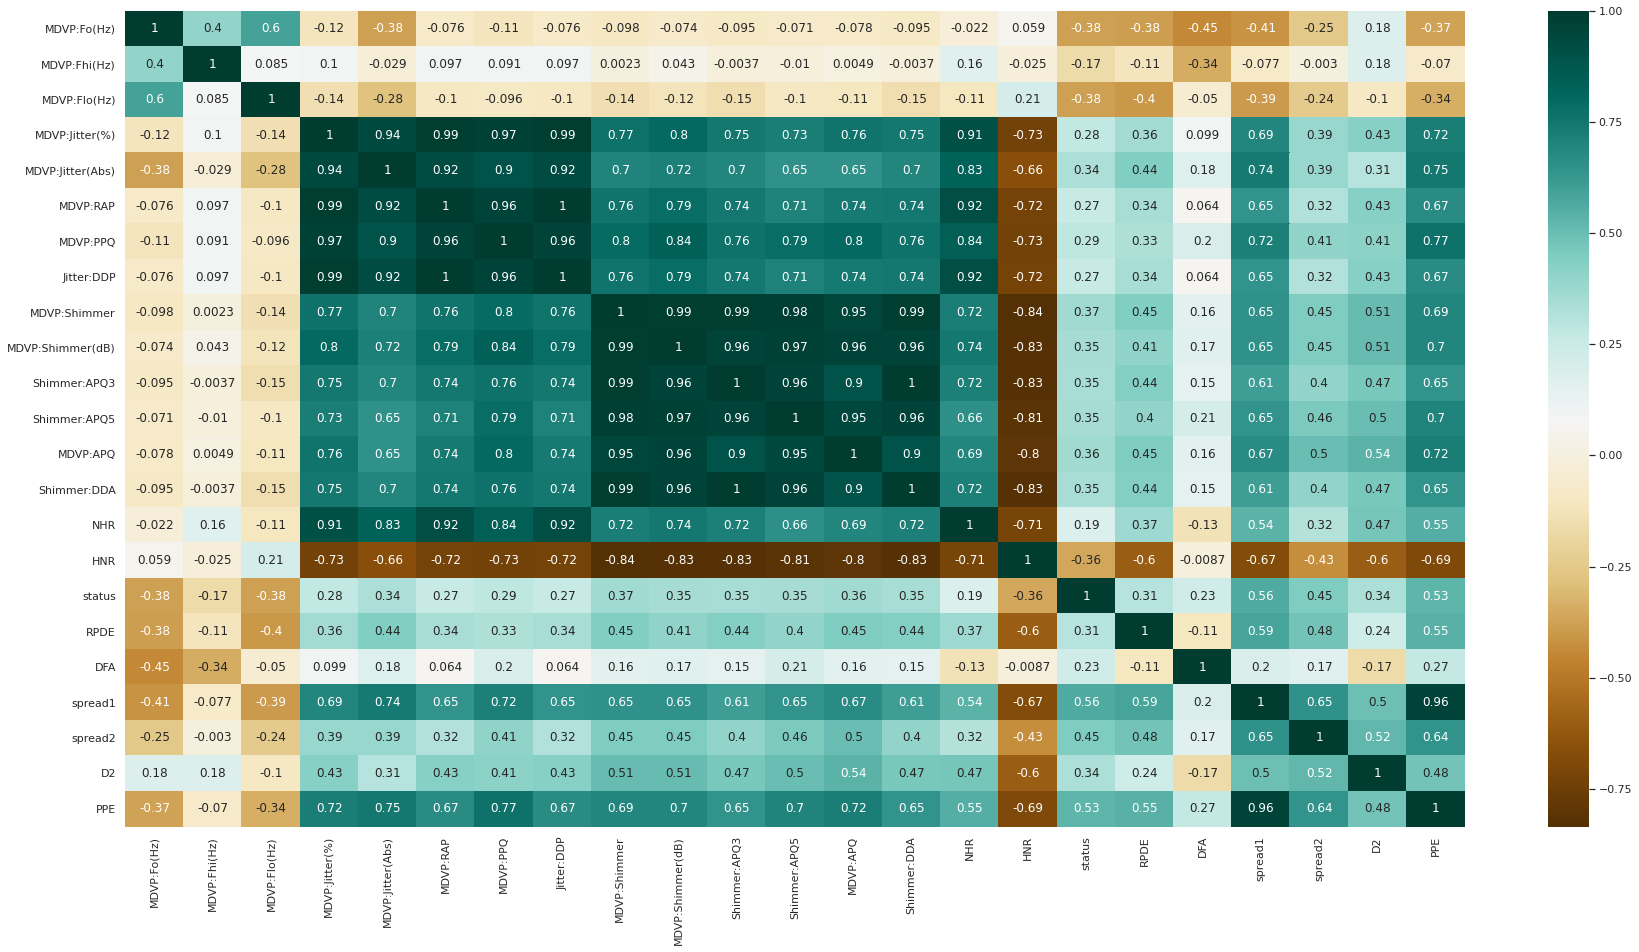

In [117]:
sns.heatmap(data.corr(), annot = True, cmap = 'BrBG')
sns.set(rc={'figure.figsize':(30,15)})

# Number of Positive and Negative detections for the disease

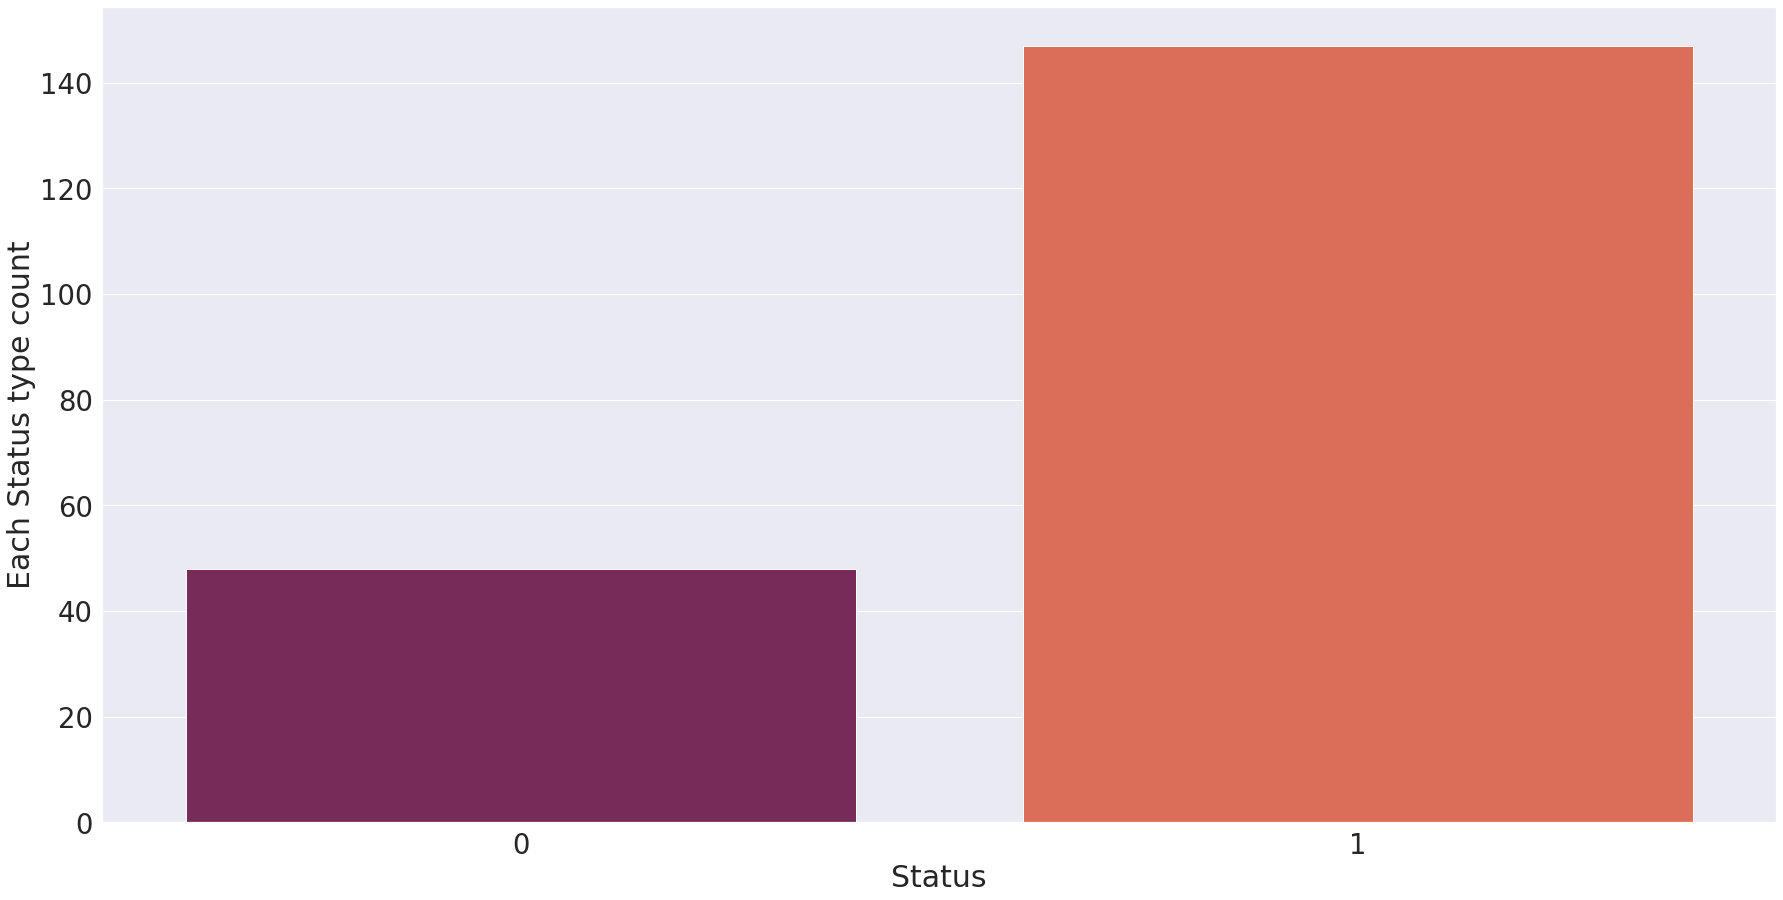

In [132]:
ax = sns.barplot(x = data['status'].unique(), y = data['status'].value_counts(),palette="rocket")
ax.set(xlabel='Status', ylabel='Each Status type count')
sns.set(font_scale=2.5)

# PPE values distribution in the dataset

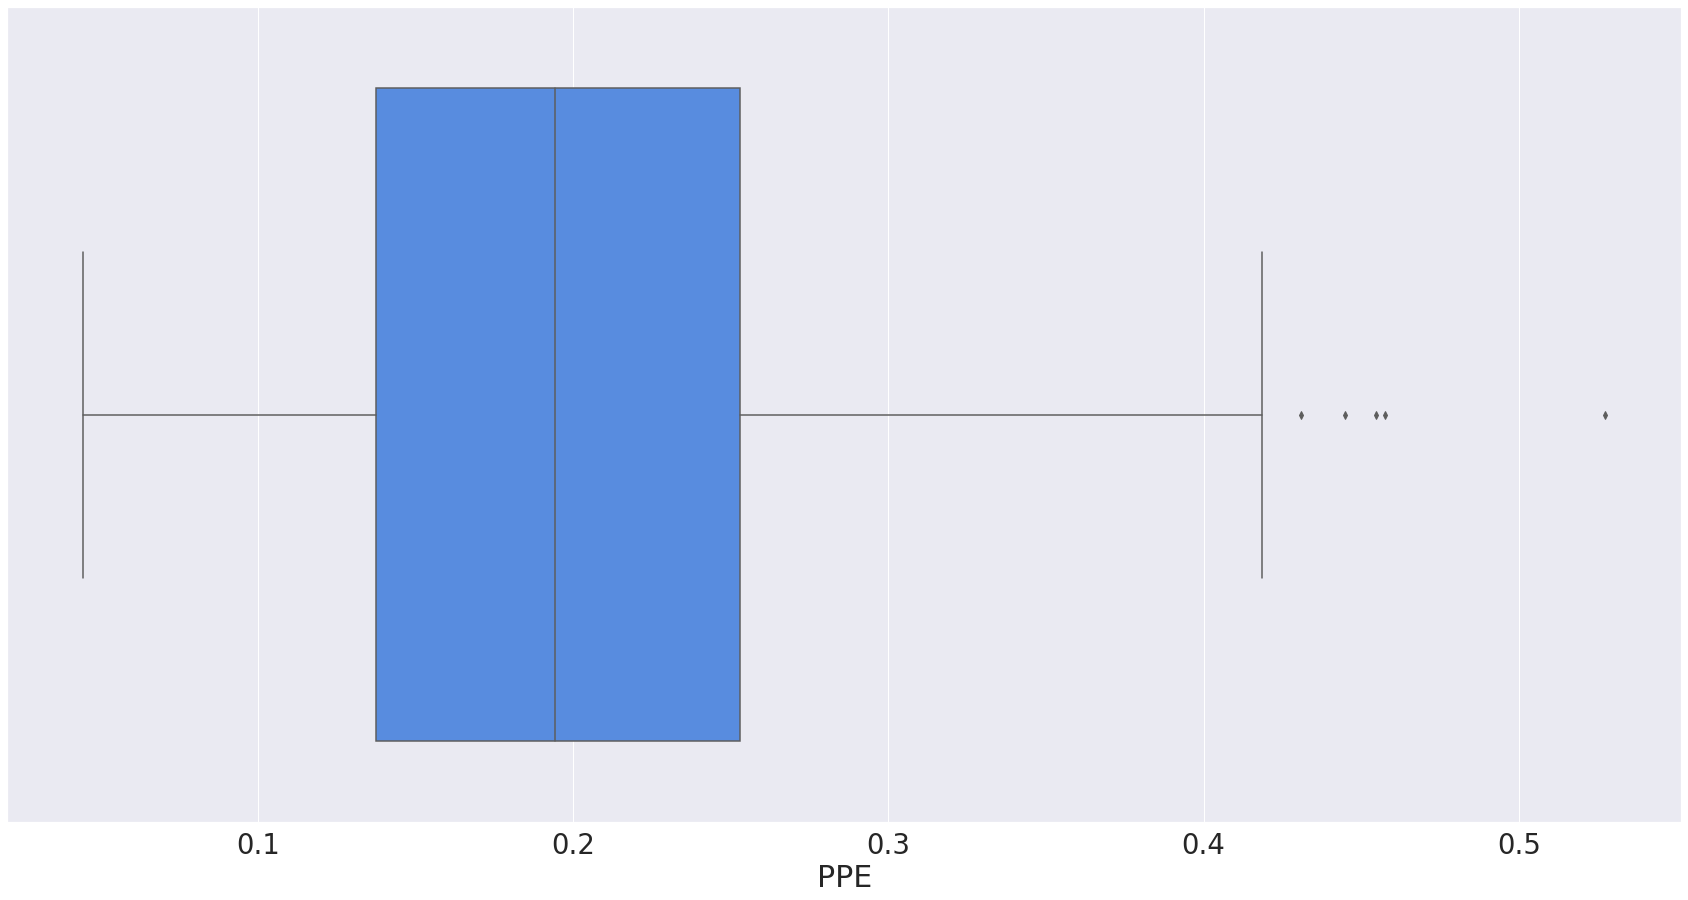

In [100]:
sns.boxplot(x = data['PPE'],color = '#4287f5')
sns.set(font_scale=2.5)

# Divide the dataset into *features* and *target*

In [101]:
features = data.loc[:,data.columns!='status'].values[:,1:]
target = data.loc[:,'status'].values

# Count of each unique status

In [102]:
print('Status = 1:',target[target==1].shape[0],',', 'Status = 0:',target[target==0].shape[0])

Status = 1: 147 , Status = 0: 48


# Standardize the features' values for better predictions

In [103]:
scaler = MinMaxScaler((-1,1))
X = scaler.fit_transform(features)
y = target

# Split the dataset into Train and Test datasets

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prediction using Decision Tree Classifier

In [105]:
DTC = DecisionTreeClassifier(max_features='auto', max_depth = 3,random_state = 42)
DTC.fit(X_train, y_train)
DTC_preds = DTC.predict(X_test)
print(accuracy_score(y_test, DTC_preds)*100)

87.17948717948718


# Classification report of Decision Tree Classifier predictions

In [106]:
print(classification_report(y_test,DTC_preds))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



# Prediction using XGBoost Classifier

In [118]:
XGB = XGBClassifier(n_estimators = 200, max_depth = 6, learning_rate = 0.1)
XGB.fit(X_train,y_train)
XGB_preds = XGB.predict(X_test)
print(accuracy_score(y_test, XGB_preds)*100)

94.87179487179486


# Classification report of XGBoost Classifier predictions

In [109]:
print(classification_report(y_test, XGB_preds))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



# Predictions using Random Forest Classifier

In [110]:
RFC = RandomForestClassifier(max_features='auto',random_state = 42)
RFC.fit(X_train,y_train)
RFC_preds = RFC.predict(X_test)
print(accuracy_score(y_test, RFC_preds)*100)

94.87179487179486


# Classification report of Random Forest Classifier predictions

In [111]:
print(classification_report(y_test,RFC_preds))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



# BUT !!!! The dataset in skewed as it has major difference in the number of positive and negative status.

### Hence we will use Stratified K-Fold

# Create Stratified K-Fold object

In [127]:
skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)

# Use Stratified K-Fold in same models used above to make predictions

In [128]:
dtc_stratified = []
xgb_stratified = []
rfc_stratified = []
for train_index,test_index in skf.split(X,y): 
    x_train_fold, x_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    DTC.fit(x_train_fold, y_train_fold)
    XGB.fit(x_train_fold, y_train_fold)
    RFC.fit(x_train_fold, y_train_fold)
    dtc_stratified.append(DTC.score(x_test_fold, y_test_fold))
    xgb_stratified.append(XGB.score(x_test_fold, y_test_fold))
    rfc_stratified.append(RFC.score(x_test_fold, y_test_fold))

# Average function to print out the average accuracy of our model across all splits

In [129]:
def Average(lst): 
    return sum(lst) / len(lst)

# The final accuracy of each model

In [130]:
print('Deciosn Tree Classifier Model Accuracy:', Average(dtc_stratified)*100)
print('Random Forest Classifier Model Accuracy:', Average(rfc_stratified)*100)
print('XGBoost Classifier Model Accuracy', Average(xgb_stratified)*100)

Deciosn Tree Classifier Model Accuracy: 83.60526315789475
Random Forest Classifier Model Accuracy: 91.1842105263158
XGBoost Classifier Model Accuracy 92.26315789473685


# Hence, XGBoost stands out as the perfect model for Parkinsons Disease Detection

### Tip: Use n_splits = 5 to get more clearance over which model stands out 